<a href="https://colab.research.google.com/github/aritanaoya/howling_canceler/blob/master/Sin_noisy.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install librosa==0.7

     |████████████████████████████████| 1.6MB 2.8MB/s 
  Created wheel for librosa: filename=librosa-0.7.0-cp36-none-any.whl size=1598345 sha256=3e9ee54b50a2fb28730f84583ad6d0611e45b08ee0e1d15c5e5582721728d1fa
  Stored in directory: /root/.cache/pip/wheels/49/1d/38/c8ad12fcad67569d8e730c3275be5e581bd589558484a0f881
Successfully built librosa
  Found existing installation: librosa 0.6.3
    Uninstalling librosa-0.6.3:
      Successfully uninstalled librosa-0.6.3


In [0]:
import numpy as np
from matplotlib import pyplot as plt
import librosa
import wave
import struct
import librosa.core as lc  
import scipy 
import IPython.display as ipd
import os
import librosa.display



A=0.5#振幅
fs = 8000#サンプリング周波数
f0 = 440#基本周波数(今回はラ)
sec = 10 #秒

#sin波
#--------------------------------------------------------------------------------------------------------------------
def create_wave(A,f0,fs,t):#A:振幅,f0:基本周波数,fs:サンプリング周波数,再生時間[s]
    #nポイント
    #--------------------------------------------------------------------------------------------------------------------
    point = np.arange(0,fs*t)
    sin_wave =A* np.sin(2*np.pi*f0*point/fs)

    sin_wave = [int(x * 32767.0) for x in sin_wave]#16bit符号付き整数に変換

    #バイナリ化
    binwave = struct.pack("h" * len(sin_wave), *sin_wave)

    #サイン波をwavファイルとして書き出し
    w = wave.Wave_write("440Hz.wav")
    p = (1, 2, fs, len(binwave), 'NONE', 'not compressed')#(チャンネル数(1:モノラル,2:ステレオ)、サンプルサイズ(バイト)、サンプリング周波数、フレーム数、圧縮形式(今のところNONEのみ)、圧縮形式を人に判読可能な形にしたもの？通常、 'NONE' に対して 'not compressed' が返されます。)
    w.setparams(p)
    w.writeframes(binwave)
    w.close()
create_wave(A, f0, fs, sec) 

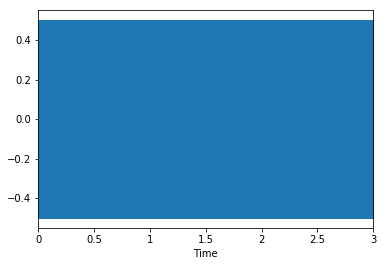

In [33]:
import IPython.display as ipd
def load_sound_files(parent_dir, file_paths):
    raw_sounds = []
    
    for fp in file_paths:
        y,sr = librosa.load(parent_dir + fp, sr=8000,dtype='float32',duration=3)
        #デフォルトでモノラル化、
        raw_sounds.append(y)
    return raw_sounds
sin_file_paths=["440Hz.wav"]
parent_dir3 = '/content/'
sin=[]
sin= load_sound_files(parent_dir3,sin_file_paths)
librosa.display.waveplot(sin[0], 8000)
ipd.Audio(data=sin,rate=8000)

In [0]:
import os, shutil

os.getcwd()
!pip install -U -q PyDrive
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials

auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

In [0]:
id = '1pfqDJw7gAFXM7EguQzvKX3vn0r3VRvrM'  # 共有リンクで取得した id= より後の部分
downloaded = drive.CreateFile({'id': id})
downloaded.GetContentFile('correct_sounds.zip')

In [7]:
!unzip correct_sounds.zip
!ls
import librosa
import librosa.core as lc  
import numpy as np  
import scipy 
import IPython.display as ipd
import os
import matplotlib.pyplot as plt

import librosa.display

Archive:  correct_sounds.zip
   creating: correct_sounds/
  inflating: correct_sounds/.DS_Store  
   creating: __MACOSX/
   creating: __MACOSX/correct_sounds/
  inflating: __MACOSX/correct_sounds/._.DS_Store  
  inflating: correct_sounds/ford8k_10s.wav  
  inflating: __MACOSX/correct_sounds/._ford8k_10s.wav  
  inflating: correct_sounds/ford8k_30s.wav  
  inflating: __MACOSX/correct_sounds/._ford8k_30s.wav  
  inflating: correct_sounds/ford8k_50s.wav  
  inflating: __MACOSX/correct_sounds/._ford8k_50s.wav  
  inflating: correct_sounds/ford8k_20s.wav  
  inflating: __MACOSX/correct_sounds/._ford8k_20s.wav  
  inflating: correct_sounds/ford8k_40s.wav  
  inflating: __MACOSX/correct_sounds/._ford8k_40s.wav  
  inflating: __MACOSX/._correct_sounds  
440Hz.wav  adc.json  correct_sounds  correct_sounds.zip  __MACOSX  sample_data


In [34]:

correct_sound_file_paths = ["ford8k_10s.wav","ford8k_20s.wav","ford8k_30s.wav","ford8k_40s.wav","ford8k_50s.wav"]
parent_dir = '/content/correct_sounds/'
correct_sounds=[]
correct_sounds= load_sound_files(parent_dir,correct_sound_file_paths)
print(correct_sounds)
sin_sounds=[]
for i in range(len(correct_sound_file_paths)):
  sin_sounds.append(correct_sounds[i] + sin[0])

print(sin_sounds)

[array([0.01116943, 0.03540039, 0.05419922, ..., 0.01535034, 0.01501465,
       0.01098633], dtype=float32), array([0.21942139, 0.2182312 , 0.4532776 , ..., 0.17999268, 0.26852417,
       0.20336914], dtype=float32), array([-0.00622559, -0.00326538,  0.01321411, ...,  0.09176636,
        0.02838135, -0.00448608], dtype=float32), array([-0.04629517,  0.05581665,  0.11105347, ...,  0.56378174,
        0.5482483 ,  0.283844  ], dtype=float32), array([-0.00091553, -0.00253296, -0.00042725, ..., -0.02462769,
       -0.03695679, -0.0071106 ], dtype=float32)]
[array([ 0.01116943,  0.20474243,  0.3728943 , ..., -0.41497803,
       -0.30368042, -0.15835571], dtype=float32), array([ 0.21942139,  0.38757324,  0.77197266, ..., -0.2503357 ,
       -0.0501709 ,  0.0340271 ], dtype=float32), array([-0.00622559,  0.16607666,  0.33190918, ..., -0.338562  ,
       -0.29031372, -0.17382812], dtype=float32), array([-0.04629517,  0.22515869,  0.42974854, ...,  0.13345337,
        0.22955322,  0.11450195], 

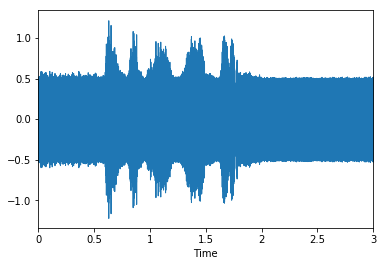

In [58]:
librosa.display.waveplot(sin_sounds[0], 8000)
ipd.Audio(data=sin_sounds[0],rate=8000)

In [36]:
# Get the power spectrogram
def cal_power_spectrogram(y):
  x=[]
  for i in  range(len(y)):
    x.append(np.abs(librosa.stft(y[i],n_fft = 1024)))
  return x

train_files=[]
train_noisy_files =[]
train_files = cal_power_spectrogram(correct_sounds)
print(train_files[0].shape)

train_noisy_files = cal_power_spectrogram(sin_sounds)

(513, 94)


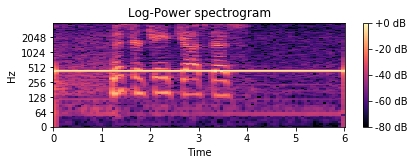

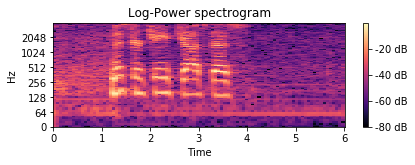

In [37]:
#音声プロット
#パワースペクトルと対数パワースペクトル
from mpl_toolkits.axes_grid1 import make_axes_locatable

def plt_power_spec(S,sr):
  plt.figure()
  plt.subplot(2, 1, 2)
  librosa.display.specshow(librosa.power_to_db(S**2, ref=np.max),
                         sr=sr, y_axis='log', x_axis='time')
  plt.colorbar(format='%+2.0f dB')
  plt.title('Log-Power spectrogram')
  plt.tight_layout()
  plt.show()
  
  

plt_power_spec(train_noisy_files[0],8000)
plt_power_spec(train_files[0],8000)

In [38]:
#griffin_limの確認（位相復元）
print(train_noisy_files[0].shape)
y=lc.griffinlim(train_noisy_files[0])
print(y.shape)
ipd.Audio(data=y,rate=8000)



(513, 94)
(23808,)


In [40]:
freq = 513
time = 94

train_num = 5
test_num = 1

#型の変更
x_train = np.zeros(freq*time*train_num*len(train_files)).reshape(train_num*len(train_files), freq, time)
x_train_noisy=np.zeros(freq*time*train_num*len(train_noisy_files)).reshape(train_num*len(train_noisy_files), freq, time)


print(x_train.shape)
print(x_train_noisy.shape)

(25, 513, 94)
(25, 513, 94)


In [41]:
for i in range(len(train_files)):
  x_train[i*train_num:(i+1)*train_num] = train_files
  x_train_noisy[i*train_num:(i+1)*train_num] =  train_noisy_files

# CNN用にデータを(batch_size, freq, time, 1)にreshape    
x_train_re=x_train.reshape(train_num*len(train_files), freq, time, 1)
x_train_noisy_re=x_train_noisy.reshape(len(train_files)*train_num, freq, time, 1)
print(x_train_re.shape)
print(x_train_noisy_re.shape)
x_train=x_train.transpose(1,2,0)
x_train_noisy=x_train_noisy.transpose(1,2,0)
print(x_train.shape)
print(x_train_noisy.shape)

(25, 513, 94, 1)
(25, 513, 94, 1)
(513, 94, 25)
(513, 94, 25)


In [0]:
import keras
from keras.models import Model
from keras.layers import Input, Dense, Dropout, Activation, Flatten,Reshape,MaxPooling2D,UpSampling2D
from keras.layers import Conv2D, GlobalAveragePooling2D
from keras.layers import BatchNormalization, Add
from keras.callbacks import EarlyStopping, ModelCheckpoint
from keras import layers

# DNCNN
input_img = Input(shape=(513, 94, 1))
x = Conv2D(64, (3, 3), padding='same')(input_img)
x = Activation('relu')(x)

for i in range(15):
    x = Conv2D(64, (3, 3), padding='same')(x)
    x = BatchNormalization()(x)
    x = Activation('relu')(x)

x = Conv2D(1, (3, 3), padding='same')(x)
output_img = Activation('tanh')(x)

# compile
model = Model(input_img, output_img)
model.compile(optimizer='adam', loss='mean_absolute_error')


In [53]:
x_val = x_train_re[20:,:,:,:]
x_noisy_val =x_train_noisy_re[20:,:,:,:]
print(x_val.shape)
print(x_noisy_val.shape)

(5, 513, 94, 1)
(5, 513, 94, 1)


In [44]:
model.summary()

Model: "model_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         (None, 513, 94, 1)        0         
_________________________________________________________________
conv2d_18 (Conv2D)           (None, 513, 94, 64)       640       
_________________________________________________________________
activation_18 (Activation)   (None, 513, 94, 64)       0         
_________________________________________________________________
conv2d_19 (Conv2D)           (None, 513, 94, 64)       36928     
_________________________________________________________________
batch_normalization_16 (Batc (None, 513, 94, 64)       256       
_________________________________________________________________
activation_19 (Activation)   (None, 513, 94, 64)       0         
_________________________________________________________________
conv2d_20 (Conv2D)           (None, 513, 94, 64)       3692

In [0]:
batch_size = 5
epochs = 50
saveDir = "/content/howling_canceller"
if not os.path.isdir(saveDir):
    os.makedirs(saveDir)

In [54]:
# options
es_cb = EarlyStopping(monitor='val_loss', patience=2, verbose=1, mode='auto')
chkpt = saveDir + 'sin_noise_canceller_win5rb_weights.{epoch:02d}-{loss:.2f}-{val_loss:.2f}.hdf5'
cp_cb = ModelCheckpoint(filepath = chkpt, monitor='val_loss', verbose=1, save_best_only=True, mode='auto')

# train
history = model.fit(x_train_noisy_re, x_train_re,
                    batch_size=batch_size,
                    epochs=epochs,
                    verbose=1,
                    validation_data=(x_noisy_val, x_val),
                    callbacks=[es_cb, cp_cb],
                    shuffle=True)

Train on 25 samples, validate on 5 samples
Epoch 1/50
25/25 [==============================] - 4s 142ms/step - loss: 0.5428 - val_loss: 0.6058

Epoch 00001: val_loss improved from inf to 0.60583, saving model to /content/howling_cancellersin_noise_canceller_win5rb_weights.01-0.54-0.61.hdf5
Epoch 2/50
25/25 [==============================] - 3s 136ms/step - loss: 0.5358 - val_loss: 0.5930

Epoch 00002: val_loss improved from 0.60583 to 0.59302, saving model to /content/howling_cancellersin_noise_canceller_win5rb_weights.02-0.54-0.59.hdf5
Epoch 3/50
25/25 [==============================] - 3s 135ms/step - loss: 0.5350 - val_loss: 0.5948

Epoch 00003: val_loss did not improve from 0.59302
Epoch 4/50
25/25 [==============================] - 3s 135ms/step - loss: 0.5342 - val_loss: 0.5685

Epoch 00004: val_loss improved from 0.59302 to 0.56846, saving model to /content/howling_cancellersin_noise_canceller_win5rb_weights.04-0.53-0.57.hdf5
Epoch 5/50
25/25 [==============================] - 3

In [55]:
#test
how_cancel=[]
how_cancel=model.predict(x_train_noisy_re)
print(how_cancel[0])


[[[ 0.48779297]
  [ 0.38570324]
  [ 0.10952459]
  ...
  [ 0.0576433 ]
  [ 0.17118983]
  [ 0.17233935]]

 [[ 0.7683252 ]
  [ 0.8212044 ]
  [ 0.2103283 ]
  ...
  [ 0.01528807]
  [ 0.17081864]
  [ 0.28501138]]

 [[ 0.81308955]
  [ 0.87932754]
  [ 0.261317  ]
  ...
  [ 0.01874488]
  [ 0.09839118]
  [ 0.2277528 ]]

 ...

 [[ 0.19961451]
  [ 0.1271446 ]
  [ 0.04141125]
  ...
  [ 0.02990418]
  [ 0.05116437]
  [ 0.12438206]]

 [[ 0.15193534]
  [ 0.0405989 ]
  [ 0.02371029]
  ...
  [ 0.03208575]
  [ 0.03752066]
  [ 0.12896737]]

 [[ 0.11564251]
  [ 0.05497492]
  [ 0.002547  ]
  ...
  [-0.02561935]
  [-0.00092424]
  [ 0.08284159]]]


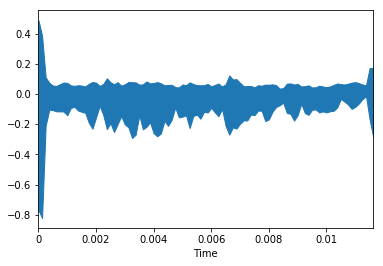

In [56]:
how_cancel_re= how_cancel[0].reshape(513,94*1)
how_cancel_gri=lc.griffinlim(how_cancel_re)
librosa.display.waveplot(how_cancel_re, 8000)
ipd.Audio(data=how_cancel_gri,rate=8000)

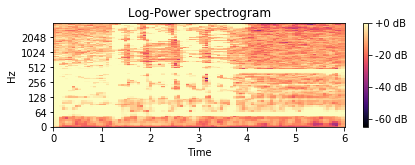

In [57]:
plt_power_spec(how_cancel_re,8000)

In [0]:
a